***
# Car sales analysis
***

1. **Évolution des ventes (scatter plot)**
    - Totales
    - VÉ vs VCI <br> <br>
2. **Analyse des caractéristiques des acheteurs de VÉ pour les années train (2017-2018)**
    - Variables quantitatives (masse, age)
    - Variables qualitative (région, ville)
***

In [1]:
# Module that sets paths
import path

path_data =     path.path_data
path_df =       path.path_df
path_output =   path.path_output

Le dossier « Dataframe » est existant
Le dossier « Output » est existant
Le dossier « Data » est existant

c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Data\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Dataframe\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Output\


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)

In [3]:
df_unique = pd.read_hdf(path_df + 'df_unique.h5')
df_unique.head(2)

,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,CG_FIXE,link_model_an,year,model,brand,prix_min,prix_max,cons_min,cons_max,prix_mean,cons_mean
0,2017,2017_0000000016,PAU,AU,FORD,ESCAP,2017,1662.0,4.0,2001.0,NaN,ROU,E,P,F,76.0,Centre-du-Québec (17),Drummond (49 ),49030.0,https://www.guideautoweb.com/constructeurs/for...,2017,escape,ford,25099.0,35999.0,7.8,11.5,30549.0,9.65
1,2017,2017_0000000022,PAU,AU,CHEVR,VOLT,2017,1578.0,4.0,1509.0,NaN,NOI,W,P,M,33.0,Saguenay–Lac-Saint-Jean (02),Saguenay (941),94068.0,https://www.guideautoweb.com/constructeurs/che...,2017,volt,chevrolet,38790.0,42890.0,5.5,5.6,40840.0,5.55


In [4]:
# Missing values
df_unique.isna().sum()

AN                         0
NOSEQ_VEH                  0
CLAS                       0
TYP_VEH_CATEG_USA          0
MARQ_VEH                   0
MODEL_VEH                  0
ANNEE_MOD                  0
MASSE_NETTE               51
NB_CYL                 70472
CYL_VEH                78366
NB_ESIEU_MAX         2242375
COUL_ORIG              42630
TYP_CARBU                  0
TYP_DOSS_PERS              0
PHYS_SEX              492920
PHYS_AGE              492920
REG_ADM                22168
MRC                    22168
CG_FIXE                22168
link_model_an         289509
year                  289509
model                 289509
brand                 289509
prix_min              289519
prix_max              309633
cons_min              368916
cons_max              368916
prix_mean             309633
cons_mean             368916
dtype: int64

***
## Categorical data
***

In [6]:
# Describe categorical data 
categorical_col = ['AN','CLAS','TYP_VEH_CATEG_USA','COUL_ORIG','TYP_CARBU','TYP_DOSS_PERS','PHYS_SEX','REG_ADM','MRC']
df_unique[categorical_col]

,AN,CLAS,TYP_VEH_CATEG_USA,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,REG_ADM,MRC
0,2017,PAU,AU,ROU,E,P,F,Centre-du-Québec (17),Drummond (49 )
1,2017,PAU,AU,NOI,W,P,M,Saguenay–Lac-Saint-Jean (02),Saguenay (941)
2,2017,PAU,AU,GRI,E,P,F,Laurentides (15),Les Laurentides (78 )
3,2017,PAU,AU,ROU,E,P,M,Lanaudière (14),Les Moulins (64 )
4,2017,PAU,AU,BLA,E,P,M,Mauricie (04),Maskinongé (51 )
...,...,...,...,...,...,...,...,...,...
421282,2021,PAU,AU,NOI,L,P,F,Saguenay–Lac-Saint-Jean (02),Lac-Saint-Jean-Est (93 )
421283,2021,PAU,AU,GRI,E,P,F,Laurentides (15),Argenteuil (76 )
421284,2021,PAU,AU,NOI,E,P,F,Chaudière-Appalaches (12),Les Etchemins (28 )
421285,2021,CAU,AU,BLE,L,M,NaN,Laval (13),Laval (65 )


In [9]:
def hist_categorical_data_less_10(df, variable):
    grouped = df.groupby(['AN', variable]).size().unstack(fill_value=0)
    ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

    ax.set_xlabel('Year')
    ax.set_ylabel('Number of sales')
    ax.set_title(f'Number of vehicles {variable} over the years')
    ax.legend(title=variable)
    plt.show()


def hist_categorical_data_more_10(df, variable):
    # Créer une column OTHER pour l'ensemble des valeurs autre que les 10 colonnes ayant le plus d'observations
    grouped = df.groupby(['AN', variable]).size().unstack(fill_value=0)
    mean_row = grouped.mean().to_frame().T
    mean_row.index = ['Mean']
    grouped = pd.concat([grouped, mean_row])
    grouped = grouped.sort_values(by='Mean', axis=1, ascending=False).drop('Mean')
    grouped['OTHER'] = grouped.iloc[:,10:].sum(axis=1)
    grouped = grouped.iloc[:, np.r_[:10, -1:0]]

    # Create the grouped bar chart
    ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of sales')
    ax.set_title(f'Number of vehicles {variable} over the years')
    ax.legend(title=variable, loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

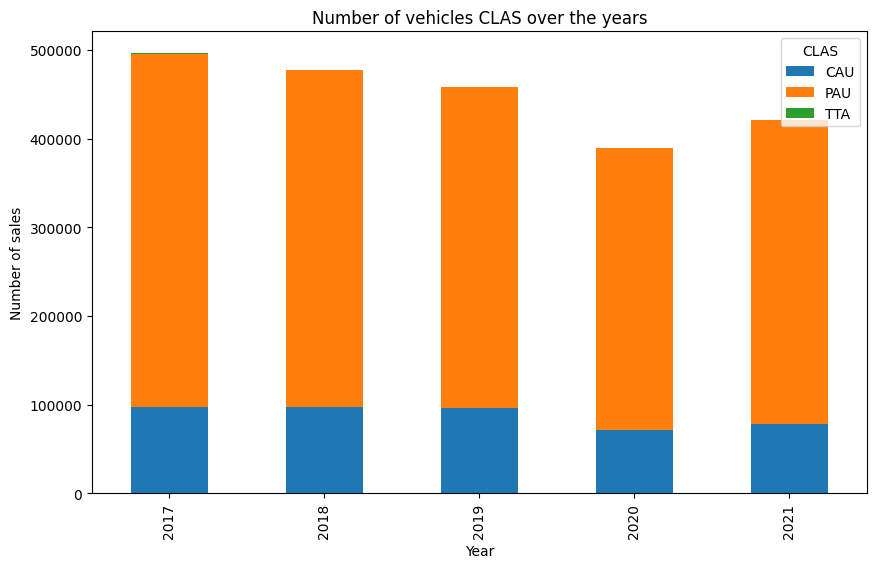

In [10]:
hist_categorical_data_less_10(df_unique, 'CLAS')

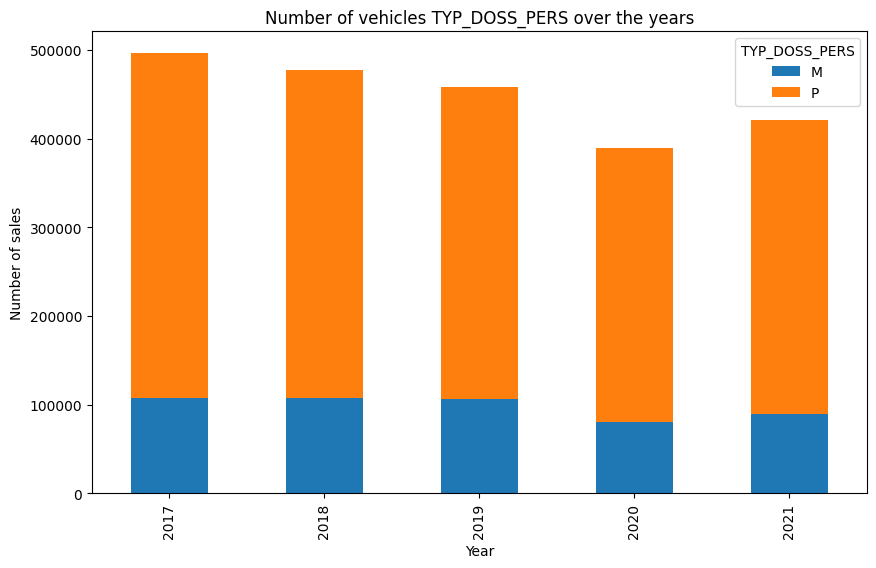

In [15]:
hist_categorical_data_less_10(df_unique, 'TYP_DOSS_PERS')

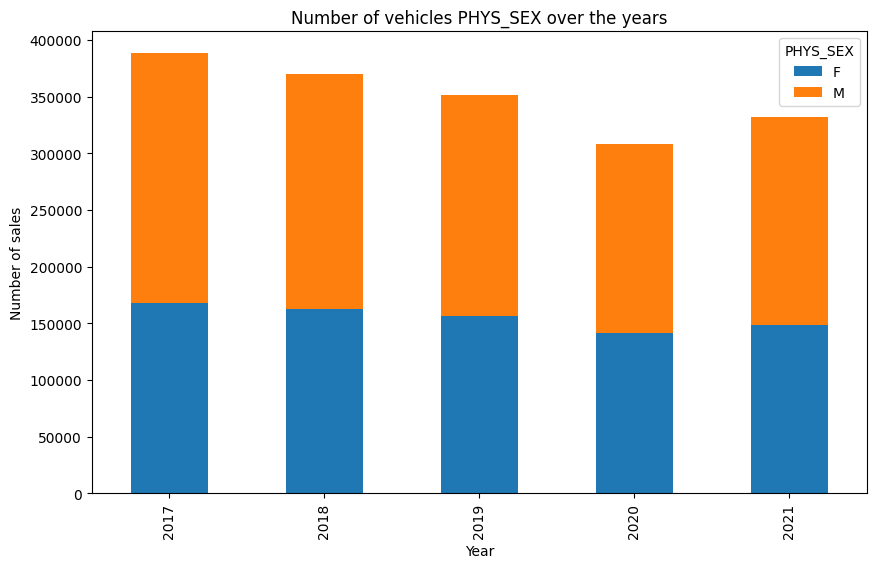

In [16]:
hist_categorical_data_less_10(df_unique, 'PHYS_SEX')

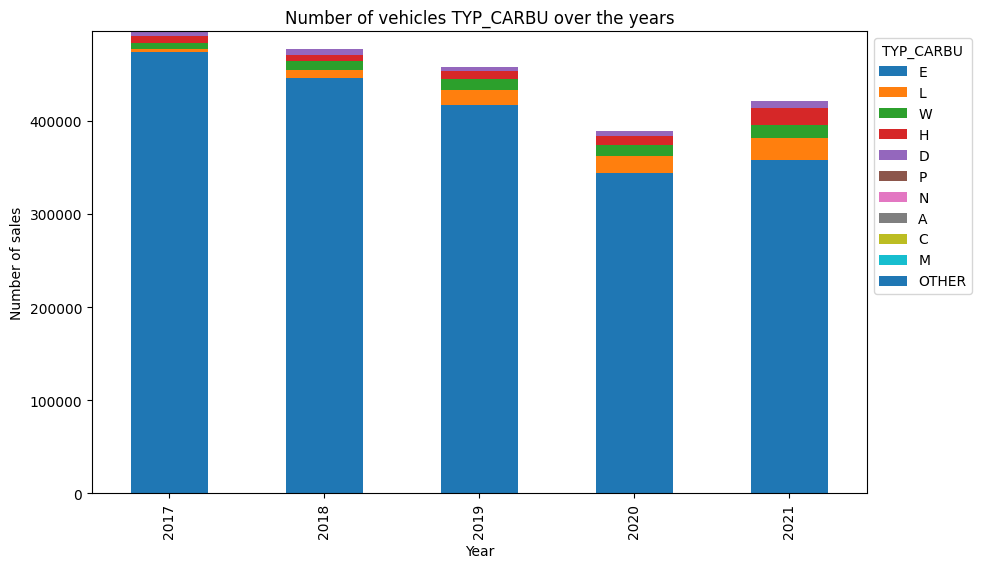

In [17]:
hist_categorical_data_more_10(df_unique, 'TYP_CARBU')

<u>**Type de carburant**</u> <br>
A = Autre <br>
C = Hydrogène <br>
D = Diésel <br>
E = Essence <br>
H = Hybride <br>
L = Électricité <br>
M = Méthanol <br>
N = Gaz naturel <br>
P = Propane <br>
S = Non-propulsé <br>
T = Éthanol <br>
W = Hybride branchable <br>
blanc = Non précisé <br>

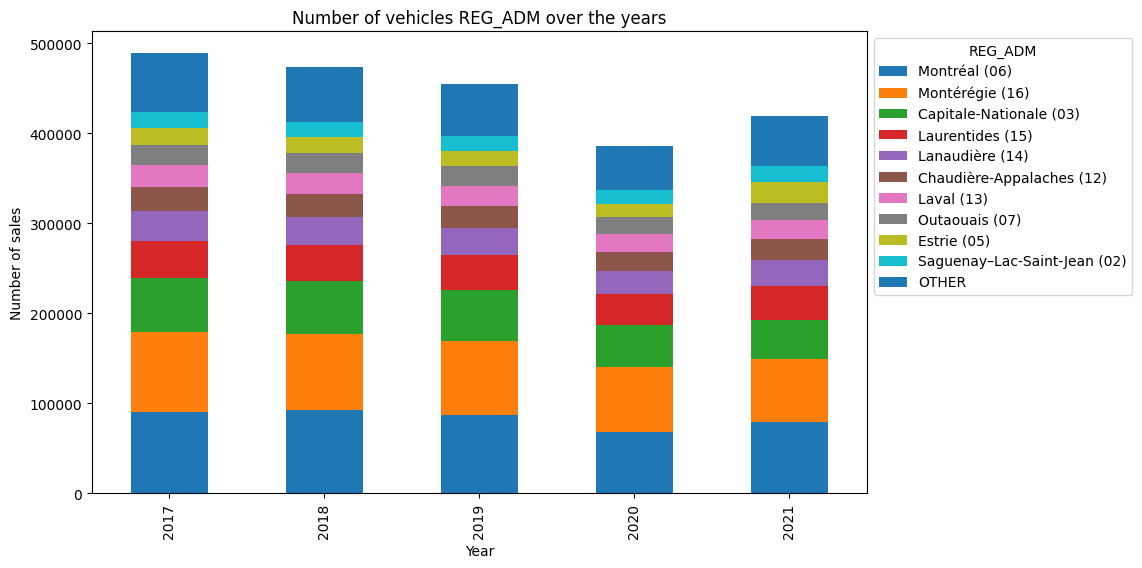

In [18]:
hist_categorical_data_more_10(df_unique, 'REG_ADM')

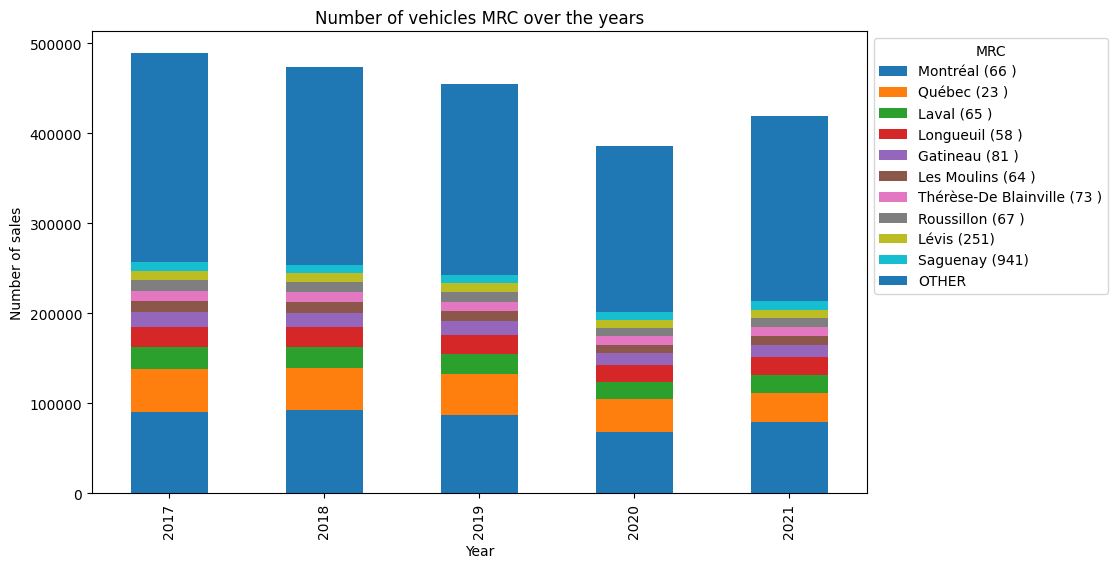

In [19]:
hist_categorical_data_more_10(df_unique, 'MRC')

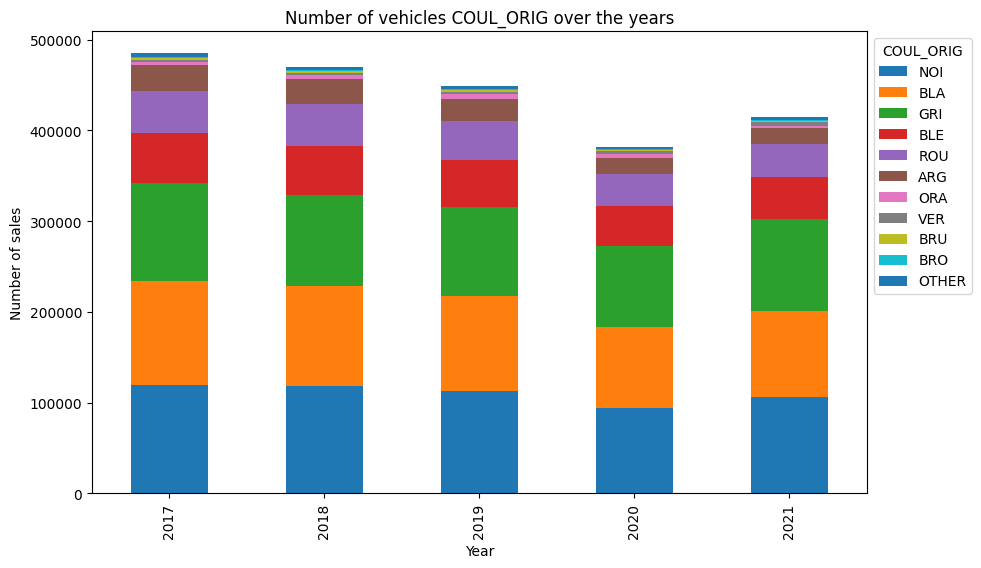

In [20]:
hist_categorical_data_more_10(df_unique, 'COUL_ORIG')

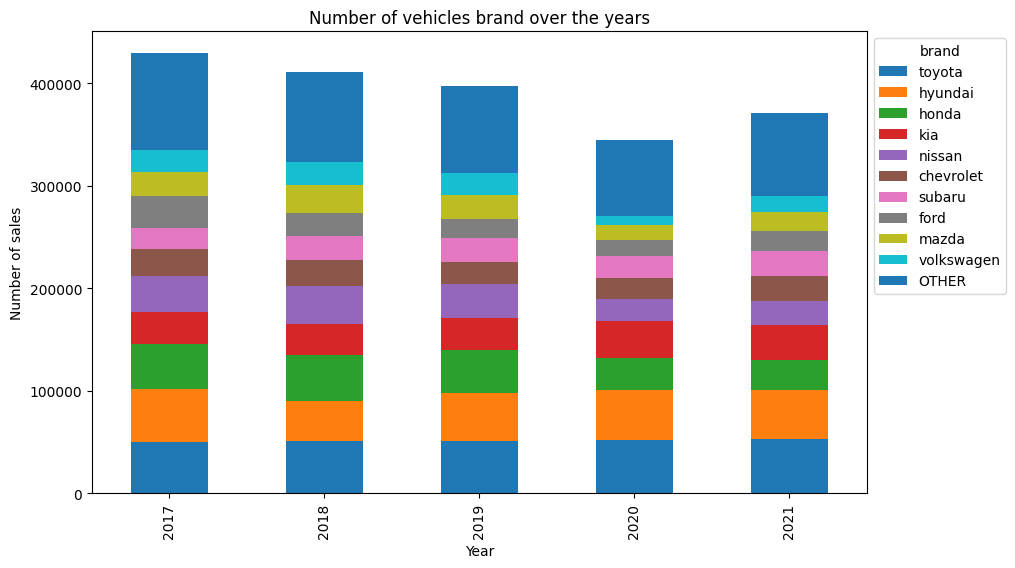

In [21]:
hist_categorical_data_more_10(df_unique, 'brand')

***
## Numérical data
***


In [5]:
# Describe numeric data
pd.options.display.float_format = '{:.2f}'.format
df_unique.describe()

,AN,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,PHYS_AGE,CG_FIXE,prix_min,prix_max,cons_min,cons_max,prix_mean,cons_mean
count,2242375.00,2242375.00,2242324.00,2171903.00,2164009.00,0.00,1749455.00,2220207.00,1952856.00,1932742.00,1873459.00,1873459.00,1932742.00,1873459.00
mean,2018.89,2019.04,1689.80,4.74,2586.95,NaN,49.26,56546.28,29173.08,45034.80,7.35,16.83,37044.46,12.09
std,1.42,1.46,386.02,1.31,1148.90,NaN,15.77,22055.93,14720.06,21608.99,1.61,22.25,17510.30,11.42
min,2017.00,2017.00,500.00,3.00,640.00,NaN,15.00,1023.00,9988.00,17188.00,1.90,2.60,13588.00,2.25
25%,2018.00,2018.00,1390.00,4.00,1984.00,NaN,37.00,41060.00,20198.00,32695.00,6.20,9.40,27650.00,7.90
50%,2019.00,2019.00,1610.00,4.00,2001.00,NaN,49.00,65005.00,26700.00,41090.00,7.10,10.70,33449.00,8.80
75%,2020.00,2020.00,1921.00,6.00,3001.00,NaN,61.00,67050.00,32998.00,50298.00,8.30,12.60,40149.00,10.55
max,2021.00,2022.00,3965.00,9.00,8396.00,NaN,100.00,99902.00,562790.00,850000.00,16.20,100.00,650000.00,58.10


**Note** : 
1. There seems to be some outliers in prices and consumptions

In [29]:
col_numerique = ['AN', 'MARQ_VEH', 'MODEL_VEH', 'TYP_CARBU', 'MASSE_NETTE', 'NB_CYL', 'CYL_VEH', 'PHYS_AGE', 'prix_mean', 'cons_mean']
df_unique[col_numerique].head()

,AN,MARQ_VEH,MODEL_VEH,TYP_CARBU,MASSE_NETTE,NB_CYL,CYL_VEH,PHYS_AGE,prix_mean,cons_mean
0,2017,FORD,ESCAP,E,1662.00,4.00,2001.00,76.00,30549.00,9.65
1,2017,CHEVR,VOLT,W,1578.00,4.00,1509.00,33.00,40840.00,5.55
2,2017,NISSA,VERSA,E,1113.00,4.00,1607.00,87.00,17123.00,7.40
3,2017,TOYOT,YARIS,E,1050.00,4.00,1492.00,57.00,18010.00,6.85
4,2017,NISSA,PATHF,E,2018.00,6.00,3509.00,24.00,40598.00,10.45


In [11]:
# histogram fonction
def hist_graph(df, variable):
    plt.figure(figsize=(12, 6))
    plt.hist(df[variable], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Number of Observations')
    plt.grid(axis='y', alpha=0.7)
    plt.show()

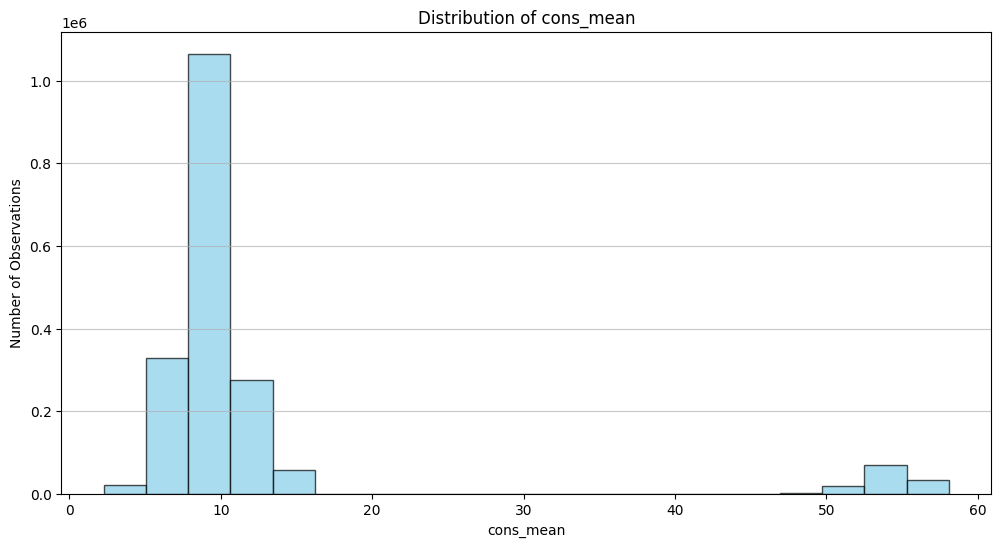

In [12]:
hist_graph(df_unique, 'cons_mean')

In [65]:
# Outlier analysis
cons_outliers = df_unique.loc[df_unique['cons_mean']>40].head(3)
print(len(cons_outliers))
cons_outliers

# Ce sont clairement des mismatchs
# Pour l'instant moins grave puisque notre modèle ne prend pas la consommatione en compte.

3


,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,CG_FIXE,link_model_an,year,model,brand,prix_min,prix_max,cons_min,cons_max,prix_mean,cons_mean
23,2017,2017_0000000245,PAU,AU,FORD,FOCUS,2017,1296.00,4.00,2001.00,NaN,GRI,E,P,M,76.00,Capitale-Nationale (03),Québec (23 ),23027.00,https://www.guideautoweb.com/constructeurs/for...,2017,focus,ford,17398.00,48418.00,12.20,100.00,32908.00,56.10
101,2017,2017_0000001023,PAU,AU,HYUND,IONIQ,2017,1477.00,4.00,1607.00,NaN,GRI,H,P,M,59.00,Chaudière-Appalaches (12),Lévis (251),25213.00,https://www.guideautoweb.com/constructeurs/hyu...,2017,ioniq,hyundai,24299.00,41849.00,4.50,100.00,33074.00,52.25
111,2017,2017_0000001170,PAU,AU,KIA,SOUL,2018,1303.00,4.00,1607.00,NaN,ARG,E,P,F,73.00,Capitale-Nationale (03),Québec (23 ),23027.00,https://www.guideautoweb.com/constructeurs/kia...,2018,soul,kia,19995.00,39895.00,9.50,100.00,29945.00,54.75


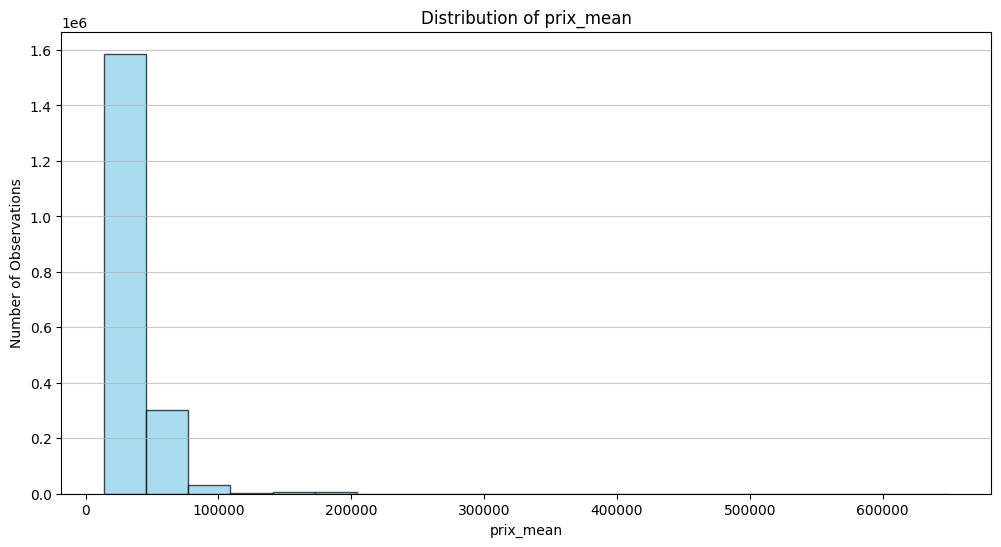

In [6]:
hist_graph(df_unique, 'prix_mean') 

In [66]:
# Outlier analysis
price_outliers = df_unique.loc[df_unique['prix_mean']>250000].head(3)
print(len(price_outliers))
price_outliers

# There is no problem here, just expensive cars

3


,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,CG_FIXE,link_model_an,year,model,brand,prix_min,prix_max,cons_min,cons_max,prix_mean,cons_mean
6835,2017,2017_0000091711,PAU,AU,FERRA,488,2017,1420.00,8.00,3903.00,NaN,ROU,E,P,M,70.00,Montréal (06),Montréal (66 ),66023.00,https://www.guideautoweb.com/constructeurs/fer...,2017,488,ferrari,301000.00,334409.00,10.70,14.70,317704.50,12.70
32143,2017,2017_0000424409,CAU,AU,BENTL,FLYIN,2017,2450.00,8.00,4001.00,NaN,GRI,E,M,NaN,NaN,Montréal (06),Montréal (66 ),66023.00,https://www.guideautoweb.com/constructeurs/ben...,2017,flying-spur,bentley,251600.00,325490.00,9.90,19.60,288545.00,14.75
33340,2017,2017_0000440079,PAU,AU,BENTL,CONTI,2017,2320.00,9.00,6002.00,NaN,NOI,E,P,M,73.00,Capitale-Nationale (03),Québec (23 ),23027.00,https://www.guideautoweb.com/constructeurs/ben...,2017,continental-gt,bentley,264264.00,430155.00,9.30,21.90,347209.50,15.60


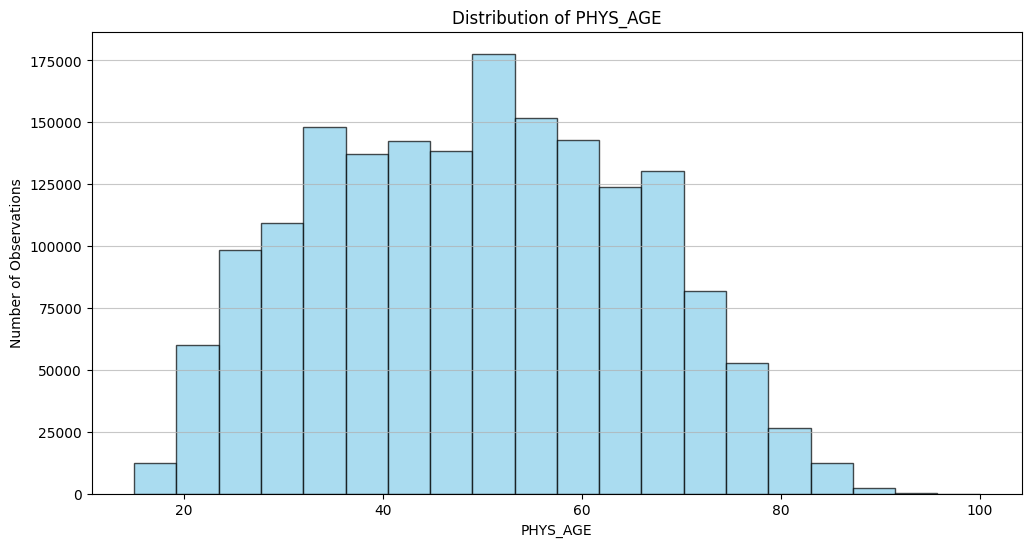

In [7]:
hist_graph(df_unique, 'PHYS_AGE') 

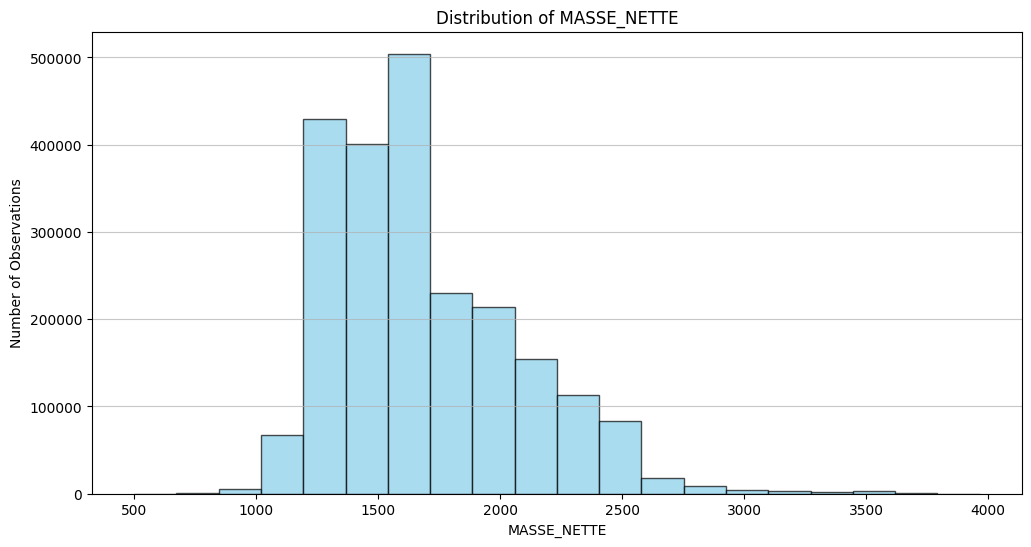

In [8]:
hist_graph(df_unique, 'MASSE_NETTE') 

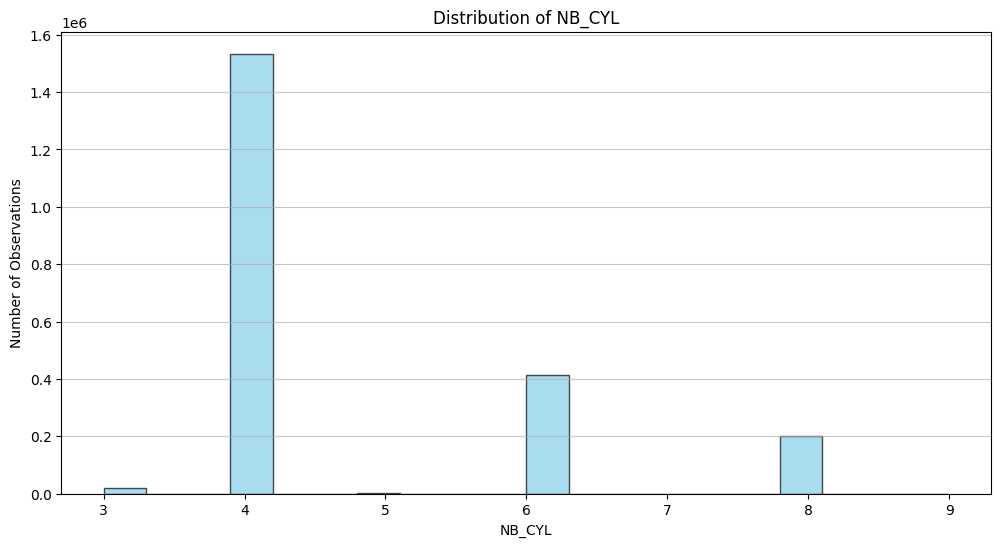

In [9]:
hist_graph(df_unique, 'NB_CYL') 

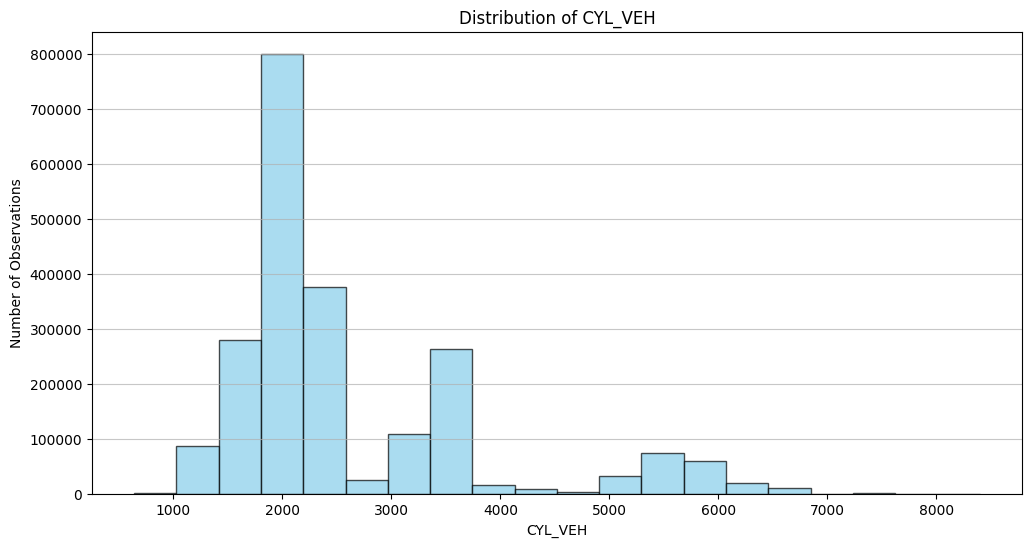

In [10]:
hist_graph(df_unique, 'CYL_VEH') 

***
## Analyse specifique au VEB et VHB
***

In [34]:
# Violion plot fonction
def violinplot(df, x, y):
    plt.figure(figsize=(8, 4))
    sns.violinplot(data=df, x=x, y=y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Violonplot of {y} for different Years')
    plt.show()

# Create dataframe with only electrics and rechargeble hybrids
def vze_transformation(carbu):
    df = df_unique.loc[df_unique['TYP_CARBU']==carbu].copy()
    df['brand_model'] = df['MARQ_VEH'] + '_' + df['MODEL_VEH']
    return df 

veb = vze_transformation('L')
vhb = vze_transformation('W')
ess = vze_transformation('E')
veb.head(2)

,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,CG_FIXE,link_model_an,year,model,brand,prix_min,prix_max,cons_min,cons_max,prix_mean,cons_mean,brand_model
80,2017,2017_0000000800,PAU,AU,CHEVR,BOLT,2017,1616.0,NaN,NaN,NaN,BLA,L,P,F,58.0,Outaouais (07),Gatineau (81 ),81017.0,https://www.guideautoweb.com/constructeurs/che...,2017,bolt-ev,chevrolet,43095.0,48095.0,NaN,NaN,45595.0,NaN,CHEVR_BOLT
389,2017,2017_0000004969,PAU,AU,HYUND,IONIQ,2017,1370.0,NaN,NaN,NaN,BLE,L,P,M,43.0,Capitale-Nationale (03),Québec (23 ),23027.0,https://www.guideautoweb.com/constructeurs/hyu...,2017,ioniq,hyundai,24299.0,41849.0,4.5,100.0,33074.0,52.25,HYUND_IONIQ


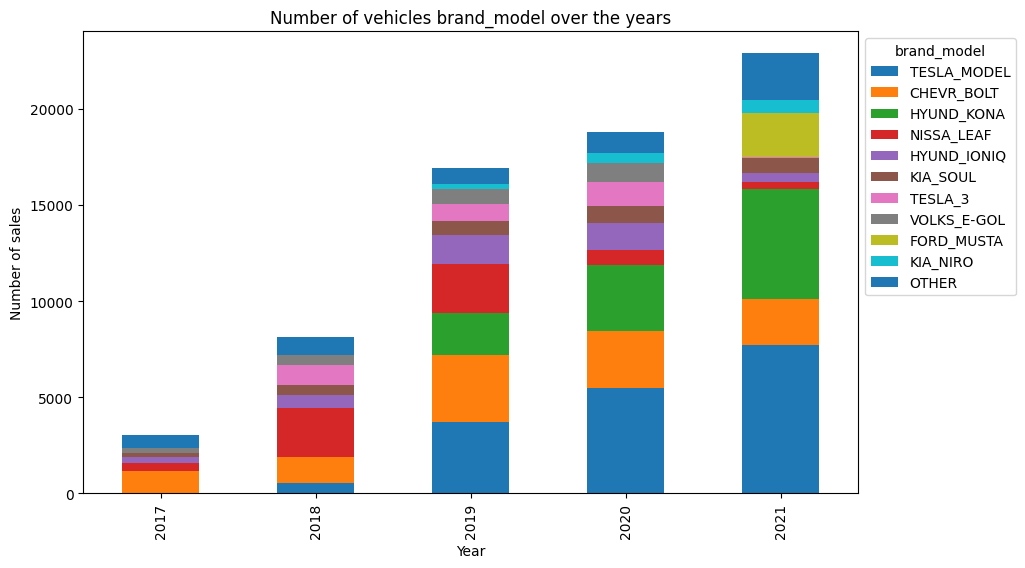

In [26]:
hist_categorical_data_more_10(veb, 'brand_model')

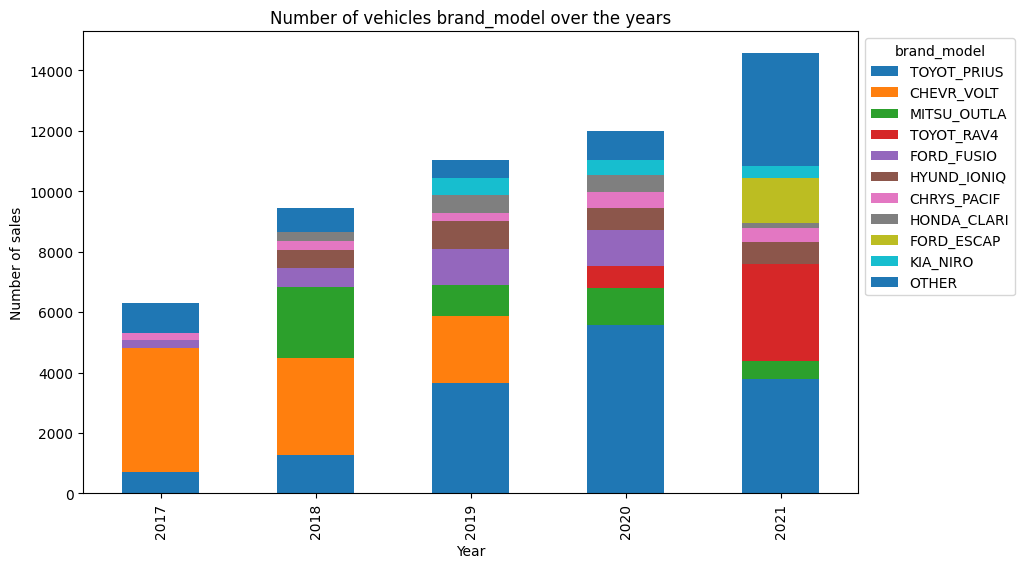

In [29]:
hist_categorical_data_more_10(vhb, 'brand_model')

In [30]:
veb.head(2)

,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,CG_FIXE,link_model_an,year,model,brand,prix_min,prix_max,cons_min,cons_max,prix_mean,cons_mean,brand_model
80,2017,2017_0000000800,PAU,AU,CHEVR,BOLT,2017,1616.0,NaN,NaN,NaN,BLA,L,P,F,58.0,Outaouais (07),Gatineau (81 ),81017.0,https://www.guideautoweb.com/constructeurs/che...,2017,bolt-ev,chevrolet,43095.0,48095.0,NaN,NaN,45595.0,NaN,CHEVR_BOLT
389,2017,2017_0000004969,PAU,AU,HYUND,IONIQ,2017,1370.0,NaN,NaN,NaN,BLE,L,P,M,43.0,Capitale-Nationale (03),Québec (23 ),23027.0,https://www.guideautoweb.com/constructeurs/hyu...,2017,ioniq,hyundai,24299.0,41849.0,4.5,100.0,33074.0,52.25,HYUND_IONIQ


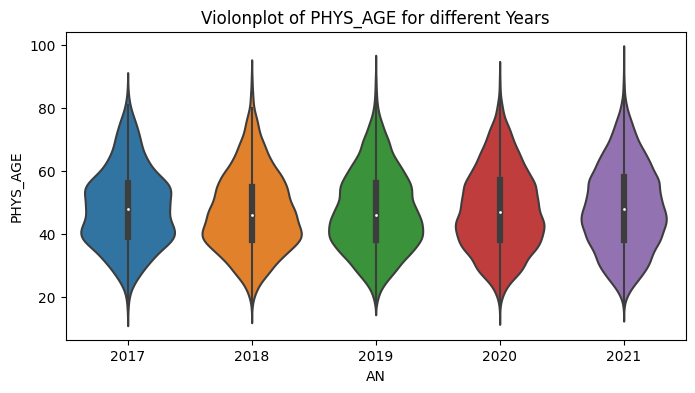

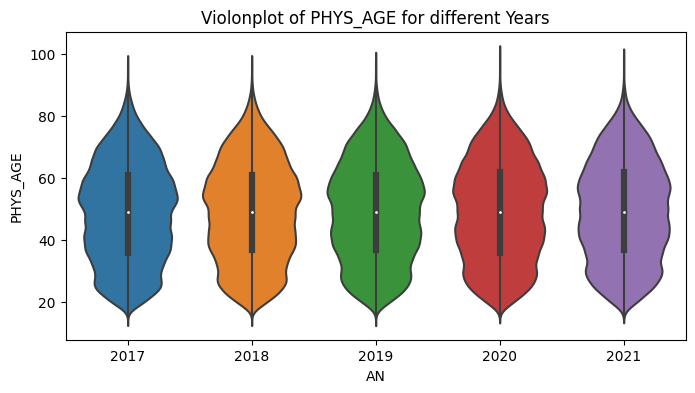

In [35]:
violinplot(veb, 'AN', 'PHYS_AGE')
violinplot(ess, 'AN', 'PHYS_AGE')

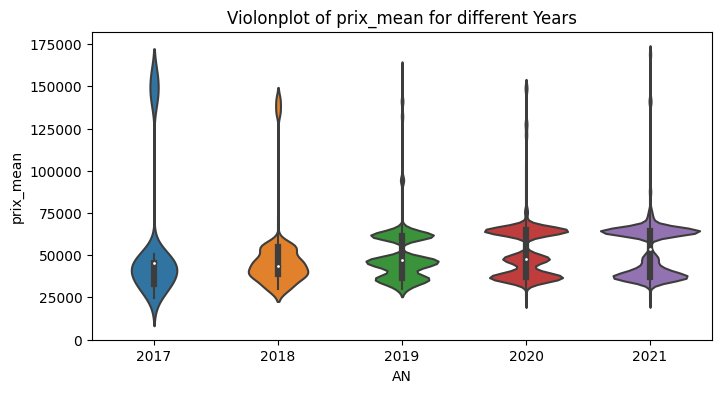

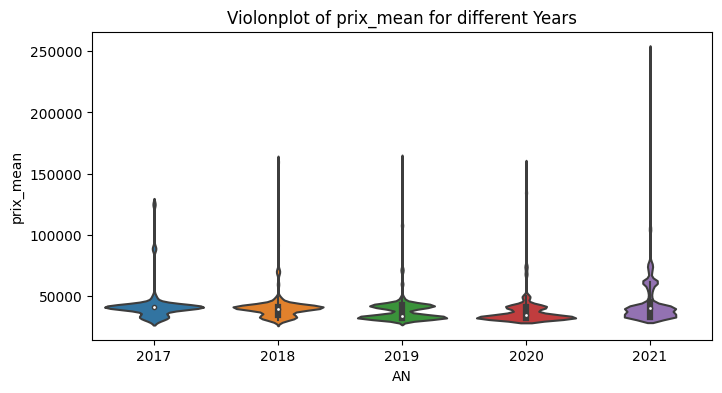

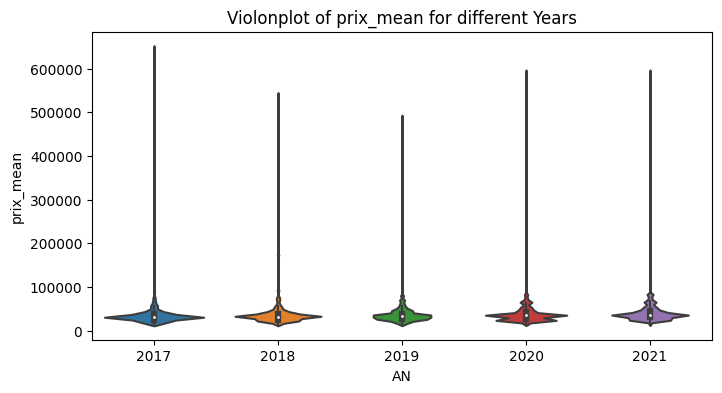

In [45]:
violinplot(veb, 'AN', 'prix_mean')
violinplot(vhb, 'AN', 'prix_mean')
violinplot(ess, 'AN', 'prix_mean')

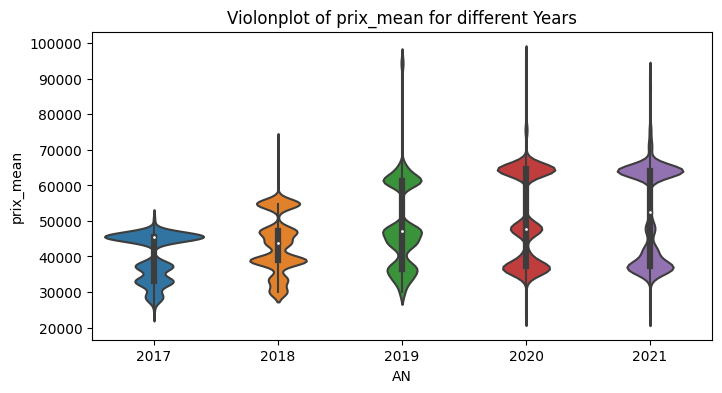

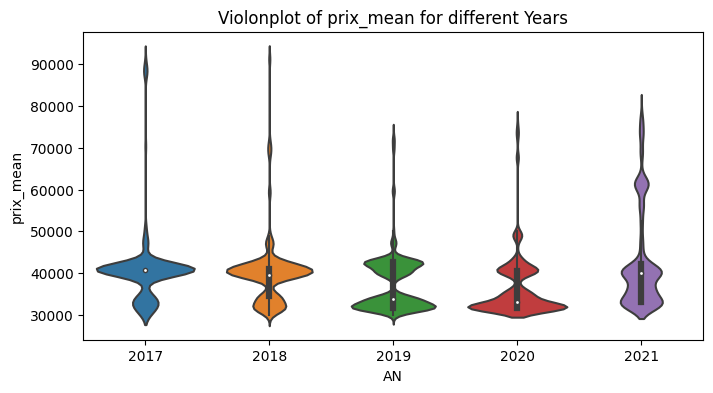

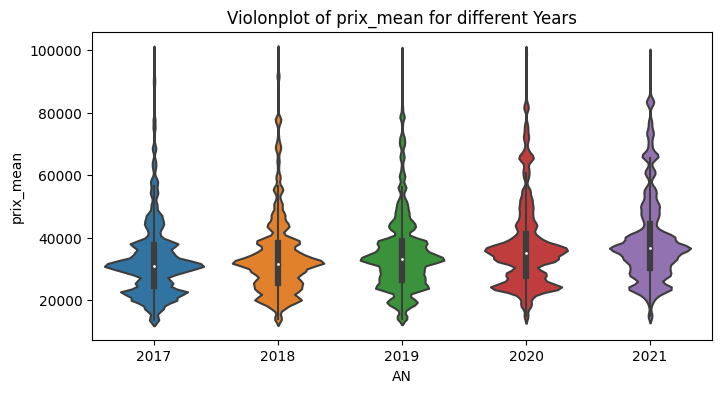

In [46]:
# Plot without outliers
veb_price_no_outliers = veb.loc[veb['prix_mean']<=100000]
vhb_price_no_outliers = vhb.loc[vhb['prix_mean']<=100000]
ess_price_no_outliers = ess.loc[ess['prix_mean']<=100000]

violinplot(veb_price_no_outliers, 'AN', 'prix_mean')
violinplot(vhb_price_no_outliers, 'AN', 'prix_mean')
violinplot(ess_price_no_outliers, 'AN', 'prix_mean')

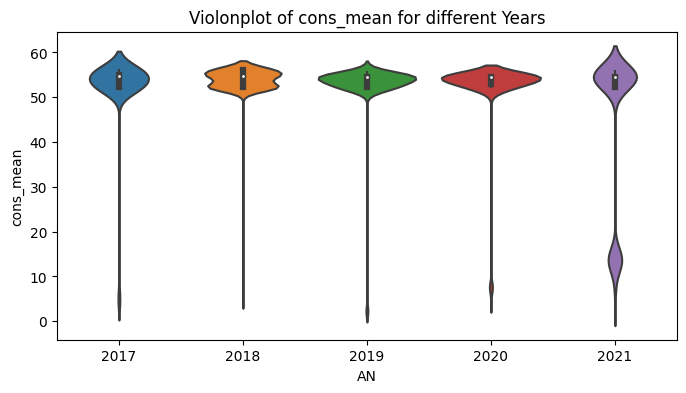

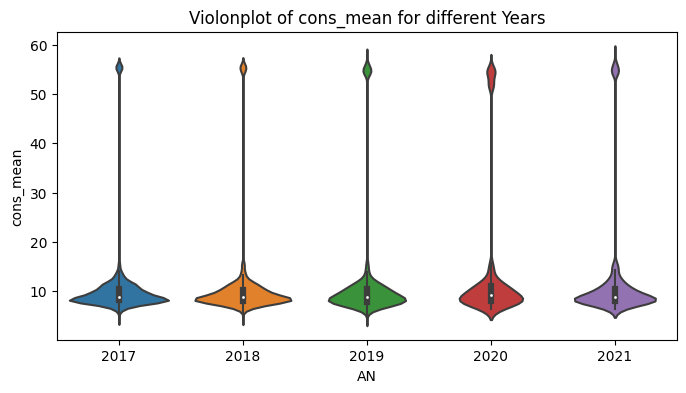

In [40]:
violinplot(veb, 'AN', 'cons_mean')
violinplot(ess, 'AN', 'cons_mean')
# Je crois que la consommation est en kwh pour les VEB ***À VÉRIFIER***

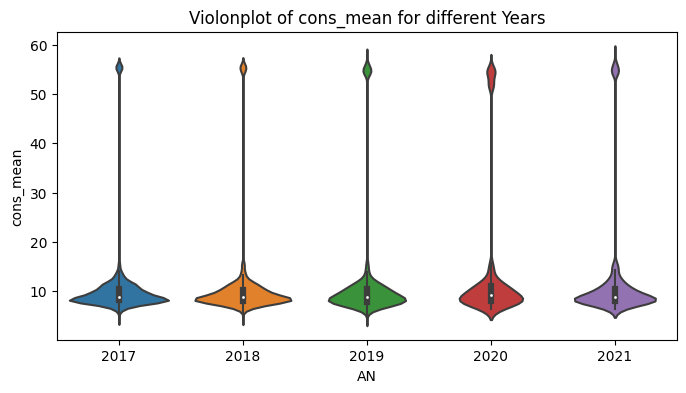

In [44]:
ess_cons_no_outliers = ess.loc[ess['cons_mean']<=25]
violinplot(ess_cons_no_outliers, 'AN', 'cons_mean')

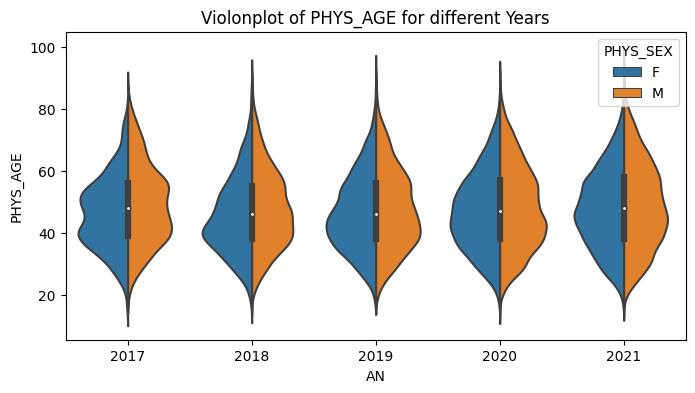

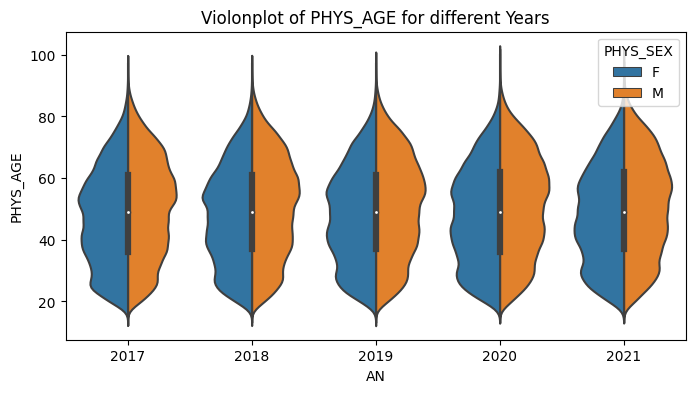

In [53]:
# violinplot(veb, 'AN', 'AGE')

plt.figure(figsize=(8, 4))
sns.violinplot(data=veb, x='AN', y='PHYS_AGE', hue='PHYS_SEX', split=True)
plt.xlabel('AN')
plt.ylabel('PHYS_AGE')
plt.title(f'Violonplot of PHYS_AGE for different Years')
plt.show()

plt.figure(figsize=(8, 4))
sns.violinplot(data=ess, x='AN', y='PHYS_AGE', hue='PHYS_SEX', split=True)
plt.xlabel('AN')
plt.ylabel('PHYS_AGE')
plt.title(f'Violonplot of PHYS_AGE for different Years')
plt.show()

***
## Relation entre les varaibles
***

In [73]:
df_unique.head(2)

,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,CG_FIXE,link_model_an,year,model,brand,prix_min,prix_max,cons_min,cons_max,prix_mean,cons_mean
0,2017,2017_0000000016,PAU,AU,FORD,ESCAP,2017,1662.00,4.00,2001.00,NaN,ROU,E,P,F,76.00,Centre-du-Québec (17),Drummond (49 ),49030.00,https://www.guideautoweb.com/constructeurs/for...,2017,escape,ford,25099.00,35999.00,7.80,11.50,30549.00,9.65
1,2017,2017_0000000022,PAU,AU,CHEVR,VOLT,2017,1578.00,4.00,1509.00,NaN,NOI,W,P,M,33.00,Saguenay–Lac-Saint-Jean (02),Saguenay (941),94068.00,https://www.guideautoweb.com/constructeurs/che...,2017,volt,chevrolet,38790.00,42890.00,5.50,5.60,40840.00,5.55


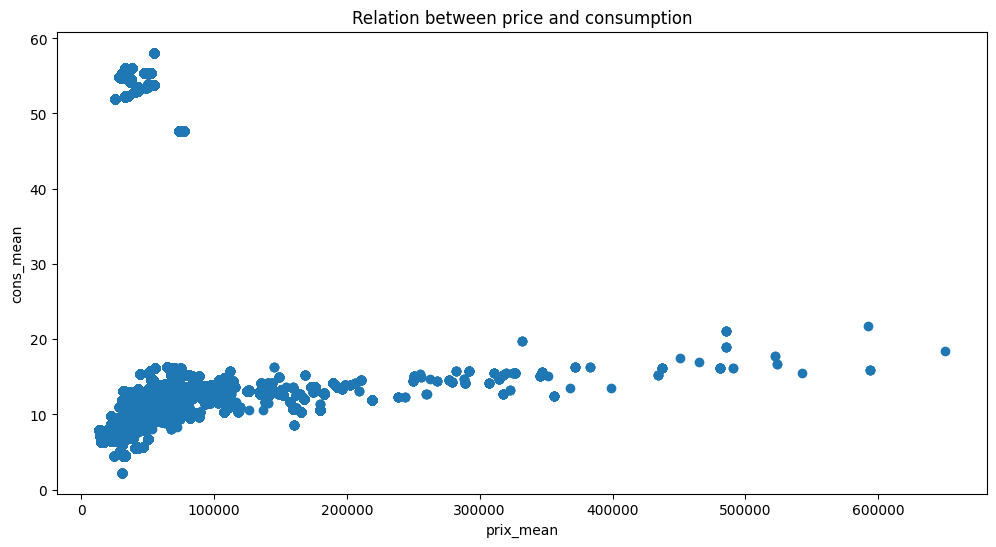

In [68]:
x = df_unique['prix_mean']
y = df_unique['cons_mean']

plt.figure(figsize=(12, 6))
plt.scatter(x, y)
plt.xlabel('prix_mean')
plt.ylabel('cons_mean')
plt.title('Relation between price and consumption')
plt.show()

# NOTER qu'il y a probablement des valeurs en kwh

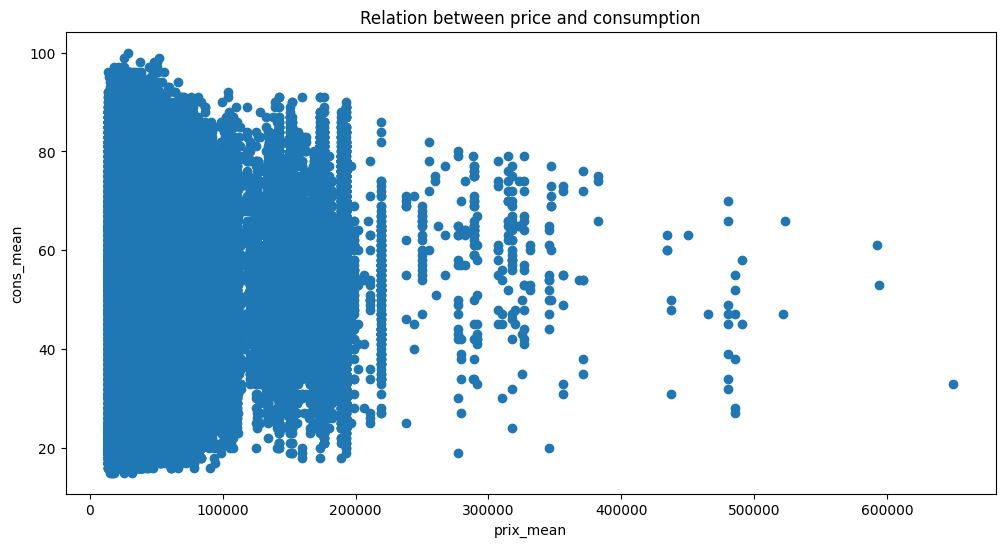

In [69]:
x = df_unique['prix_mean']
y = df_unique['PHYS_AGE']

plt.figure(figsize=(12, 6))
plt.scatter(x, y)
plt.xlabel('prix_mean')
plt.ylabel('cons_mean')
plt.title('Relation between price and consumption')
plt.show()

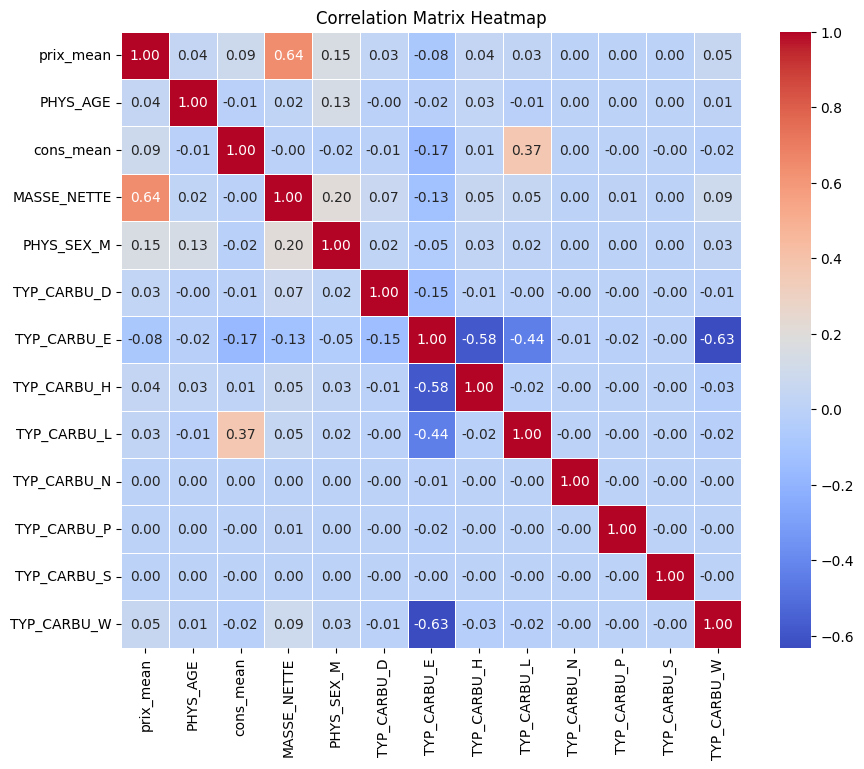

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
data = df_unique[['prix_mean', 'PHYS_AGE', 'cons_mean', 'MASSE_NETTE', 'PHYS_SEX', 'TYP_CARBU']]
data = data.dropna()

data = pd.get_dummies(data, columns=['PHYS_SEX', 'TYP_CARBU'], drop_first=True)


correlation_matrix = data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
